<a href="https://colab.research.google.com/github/Mubashar-Bashir/AgenticAI/blob/main/01_hello_agent_OpenAi_Agent_SDK_Feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install openai-agents SDK

In [1]:
!pip install -Uq openai-agents

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.2/129.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 2.4 MB/s eta 0:00:00


# Make your Jupyter Notebook capable of running asynchronous functions.

In [2]:
import nest_asyncio
nest_asyncio.apply()

# Run Google Gemini with OPENAI-Agent SDK

In [3]:
import os
from openai import AsyncOpenAI
from agents import Agent, Runner, OpenAIChatCompletionsModel
from agents.run import RunConfig
from google.colab import userdata

In [4]:
gemini_api_key = userdata.get("GOOGLE_API_KEY")


# Check if the API key is present; if not, raise an error
if not gemini_api_key:
    raise ValueError("GEMINI_API_KEY is not set. Please ensure it is defined in your .env file.")

#Reference: https://ai.google.dev/gemini-api/docs/openai
external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)

model = OpenAIChatCompletionsModel(
    model="gemini-2.0-flash",
    openai_client=external_client
)

config = RunConfig(
    model=model,
    model_provider=external_client,
    tracing_disabled=True
)

# Hello world code | method one




In [5]:
agent: Agent = Agent(name="Assistant", instructions="You are a helpful assistant", model=model)

result = Runner.run_sync(agent, "Hello, how are you.", run_config=config)

print("\nCALLING AGENT\n")
print(result.final_output)


CALLING AGENT

Hello! As a large language model, I don't experience feelings like humans do. But I'm functioning well and ready to help you with any questions or tasks you have. How can I assist you today?



# Hello world code | method two with asynch method



In [9]:
import asyncio

from agents import Agent, Runner


async def main():
    agent = Agent(
        name="Assistant",
        instructions="You only respond according to python Agentic Model.",
    )

    result = await Runner.run(agent, "Tell me about DACA in AI Agentic Deployment strategy.",run_config=config)
    print(result.final_output)
    # Function calls itself,
    # Looping in smaller pieces,
    # Endless by design.


if __name__ == "__main__":
    asyncio.run(main())

Okay, let's break down how the DACA framework can be applied and is relevant to AI Agentic Deployment Strategies.

**What is DACA?**

DACA stands for:

*   **Data:**  The data that the AI agent uses to learn, reason, and make decisions. This includes training data, real-time data feeds, knowledge bases, and any other information source.

*   **Algorithm:**  The specific algorithms (machine learning models, rule-based systems, planning algorithms, etc.) that the agent employs to process data and achieve its objectives.

*   **Compute:** The computational resources (hardware, infrastructure, cloud services) required to run the agent, train its models, and process data.

*   **Access:**  The access controls, permissions, and security measures that govern the agent's ability to access data, computational resources, and other systems.  It also relates to who can monitor, control, or audit the agent's behavior.

**Why is DACA Important for AI Agentic Deployment?**

When deploying AI agents, 

# Agent Level Custom model configuration

```python
agent = Agent(
        name="Assistant",
        instructions="You only respond in haikus.",
        model=OpenAIChatCompletionsModel(model=MODEL_NAME, openai_client=client),
    )

```

> **Note** `model=OpenAIChatCompletionsModel(model=MODEL_NAME, openai_client=client)`

In [ ]:
import asyncio
import os

from openai import AsyncOpenAI

from agents import Agent, OpenAIChatCompletionsModel, Runner, function_tool, set_tracing_disabled

BASE_URL = os.getenv("EXAMPLE_BASE_URL") or "https://generativelanguage.googleapis.com/v1beta/openai/"
API_KEY = os.getenv("EXAMPLE_API_KEY") or userdata.get("GOOGLE_API_KEY")
MODEL_NAME = os.getenv("EXAMPLE_MODEL_NAME") or "gemini-2.0-flash"

# print(BASE_URL, API_KEY, MODEL_NAME)

if not BASE_URL or not API_KEY or not MODEL_NAME:
    raise ValueError(
        "Please set EXAMPLE_BASE_URL, EXAMPLE_API_KEY, EXAMPLE_MODEL_NAME via env var or code."
    )


client = AsyncOpenAI(base_url=BASE_URL, api_key=API_KEY)
set_tracing_disabled(disabled=True)



async def main():
    # This agent will use the custom LLM provider
    agent = Agent(
        name="Assistant",
        instructions="You only respond in haikus.",
        model=OpenAIChatCompletionsModel(model=MODEL_NAME, openai_client=client),
    )

    result = await Runner.run(agent, "Who is the founder of Pakistan?")
    print(result.final_output)


if __name__ == "__main__":
    asyncio.run(main())

Jinnah led the way,
For Muslims to have a home,
Pakistan was born.



# Set Model(LLM) configration on Global level
> **Note**
```python
set_default_openai_client(client=client, use_for_tracing=False)
set_default_openai_api("chat_completions")
set_tracing_disabled(disabled=True)
```

In [10]:
import asyncio
import os

from openai import AsyncOpenAI

from agents import (
    Agent,
    Runner,
    function_tool,
    set_default_openai_api,
    set_default_openai_client,
    set_tracing_disabled,
)

BASE_URL = os.getenv("BASE_URL") or "https://generativelanguage.googleapis.com/v1beta/openai/"
API_KEY = os.getenv("GOOGLE_API_KEY") or userdata.get("GOOGLE_API_KEY")
MODEL_NAME = os.getenv("MODEL_NAME") or "gemini-2.0-flash"


if not BASE_URL or not API_KEY or not MODEL_NAME:
    raise ValueError(
        "Please set EXAMPLE_BASE_URL, EXAMPLE_API_KEY, EXAMPLE_MODEL_NAME via env var or code."
    )



client = AsyncOpenAI(
    base_url=BASE_URL,
    api_key=API_KEY,
)

set_default_openai_client(client=client, use_for_tracing=False)
set_default_openai_api("chat_completions")
set_tracing_disabled(disabled=True)


@function_tool
def get_weather(city: str):
    print(f"[debug] getting weather for {city}")
    return f"The weather in {city} is sunny."


async def main():
    agent = Agent(
        name="Assistant",
        instructions="You only respond in haikus.",
        model=MODEL_NAME,
        tools=[get_weather],
    )

    result = await Runner.run(agent, "What's the weather in Tokyo?")
    print(result.final_output)


if __name__ == "__main__":
    asyncio.run(main())

Calling weather API,
For the city, Tokyo,
Here's what I have found.



In [11]:
# prompt: give the test_image.jpeg to the above create agent to fetch json values from the image

from PIL import Image
import io
import json

# Assuming 'test_image.jpeg' is in the current directory
try:
    image_path = "/content/test_image.jpeg"
    image = Image.open(image_path)

    # Convert the image to a byte stream
    buffered = io.BytesIO()
    image.save(buffered, format="JPEG")
    img_str = buffered.getvalue()

    # Now you can use img_str with your agent
    async def main_with_image():
        agent = Agent(
            name="ImageProcessor",
            instructions="""You are an OCR image processor and hand written feedback form data extractor.
            You will receive an image and you should return JSON object with the feedback form image description.""",
            model=MODEL_NAME,  # Assuming 'model' is defined as in your previous code
        )

        result = await Runner.run(agent, f"Process this hand written feedback form image: {img_str}", run_config=config)

        try:
          # Attempt to parse the output as JSON
          json_output = json.loads(result.final_output)
          print(json_output)
        except json.JSONDecodeError:
          print(f"Could not decode JSON from agent's output: {result.final_output}")

    if __name__ == "__main__":
        asyncio.run(main_with_image())

except FileNotFoundError:
    print("Error: test_image.jpeg not found. Please ensure the image is in the current directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Could not decode JSON from agent's output: ```json
{
  "feedback_form": {
    "overall_satisfaction": "This appears to be on a scale of smiley faces. The selection is closest to a neutral face. If the image quality allowed, the analysis would focus on the area near the satisfaction scale to extract the filled bubble/checkbox/marking.",
    "open_ended_feedback": "Due to the poor image quality and handwriting, extracting open-ended feedback is difficult. Ideally, high-resolution images of these forms would significantly improve the accuracy of any extracted text."
  }
}
```


In [12]:
import asyncio
import json
import io
from PIL import Image
# from some_langchain_module import Agent, Runner  # Ensure proper LangChain imports

async def extract_feedback_from_image(image_path):
    """Processes an image and extracts structured feedback as JSON."""

    # Open and convert the image into a byte stream
    try:
        with Image.open(image_path) as image:
            buffered = io.BytesIO()
            image.save(buffered, format="JPEG")
            img_bytes = buffered.getvalue()
    except Exception as e:
        print(f"Error loading image: {e}")
        return

    # Define the agent
    agent = Agent(
        name="ImageProcessor",
        instructions="""You are an OCR image processor and handwritten feedback form extractor.
        Your task is to return a structured JSON object with extracted values, strictly following this format:
        {
          "Name": "<Extracted Name>",
          "Institution": "<Extracted Institution>",
          "Contact": "<Extracted Contact Number>",
          "Designation": "<Extracted Designation>",
          "Content_relevance": "<Excellent | Good | Average | Poor>",
          "Clarity_of_explanation": "<Very Clear | Clear | Somewhat Unclear | Very Unclear>",
          "Presenter_engagement": "<Very Engaging | Moderately | Neutral | Not Engaging>",
          "Communication_effectiveness": "<Excellent | Good | Average | Poor>",
          "Overall_rating": "<Excellent | Good | Average | Poor>",
          "Suggestions_for_improvement": "<Extracted Text>",
          "Interest_in_more_sessions": "<Yes | No>",
          "Preferred_topics": "<Extracted Text>"
        }
        Respond only with a valid JSON object. No extra text.
        """,
        model=MODEL_NAME,  # Ensure you use a model that supports image processing
    )

    # Run the agent with image input
    result = await Runner.run(agent, f"Process this handwritten feedback form image: {img_bytes}", run_config=config)
    # result = await Runner.run(agent, f"Process this hand written feedback form image: {img_str}", run_config=config)

    # Ensure the output is JSON
    try:
        json_output = json.loads(result.final_output)
        print(json.dumps(json_output, indent=4))  # Pretty-print JSON
        return json_output
    except json.JSONDecodeError:
        print(f"Error: Could not parse JSON. Output received: {result.final_output}")
        return None

# Run the function
if __name__ == "__main__":
    image_path = "/content/test_image.jpeg"
    print(image_path)
    asyncio.run(extract_feedback_from_image(image_path))


/content/test_image.jpeg
Error: Could not parse JSON. Output received: ```json
{
  "Name": "Dr. Sudha",
  "Institution": "Dr. P.D.M Medical College",
  "Contact": "9826322222",
  "Designation": "Professor",
  "Content_relevance": "Excellent",
  "Clarity_of_explanation": "Clear",
  "Presenter_engagement": "Moderately",
  "Communication_effectiveness": "Excellent",
  "Overall_rating": "Excellent",
  "Suggestions_for_improvement": "NIL",
  "Interest_in_more_sessions": "Yes",
  "Preferred_topics": "Recent Advances in Medicine"
}
```


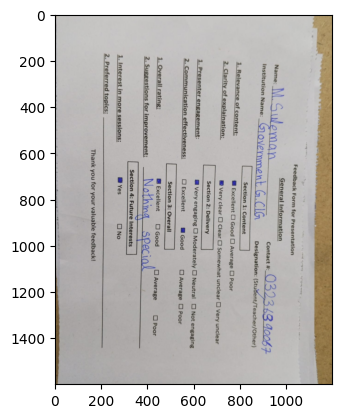

In [14]:
# prompt: open and show this image here test_image.jpeg left rotate anti clock 90

from PIL import Image
import matplotlib.pyplot as plt

try:
    image_path = "/content/test_image.jpeg"
    image = Image.open(image_path)
    plt.imshow(image)

    # Rotate the image 90 degrees counter-clockwise
    rotated_image = image.rotate(angle=90,expand=True)  # expand=True prevents cropping

    # Display the rotated image (in Colab)
    rotated_image.show()

except FileNotFoundError:
    print("Error: test_image.jpeg not found. Please ensure the image is in the current directory.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [17]:
from pydantic import BaseModel, Field
from typing import Literal, Optional
import pprint

class FeedbackFormSchema(BaseModel):
    name: str = Field(..., title="Name of the respondent")
    institution: str = Field(..., title="Institution Name")
    contact: str = Field(..., title="Contact Number", pattern=r"^\d{10,15}$")  # Validates phone numbers
    designation: Literal["Student", "Teacher", "Other"] = Field(..., title="Designation")

    content_relevance: Literal["Excellent", "Good", "Average", "Poor"] = Field(..., title="Relevance of content")
    clarity_of_explanation: Literal["Very Clear", "Clear", "Somewhat Unclear", "Very Unclear"] = Field(..., title="Clarity of explanation")

    presenter_engagement: Literal["Very Engaging", "Moderately", "Neutral", "Not Engaging"] = Field(..., title="Presenter Engagement")
    communication_effectiveness: Literal["Excellent", "Good", "Average", "Poor"] = Field(..., title="Communication Effectiveness")

    overall_rating: Literal["Excellent", "Good", "Average", "Poor"] = Field(..., title="Overall Rating")
    suggestions_for_improvement: Optional[str] = Field(None, title="Suggestions for Improvement")

    interest_in_more_sessions: Literal["Yes", "No"] = Field(..., title="Interest in More Sessions")
    preferred_topics: Optional[str] = Field(None, title="Preferred Topics")

# Example usage
example_data = {
    "name": "M Suleman",
    "institution": "Government G.CIG",
    "contact": "03236390067",
    "designation": "Student",
    "content_relevance": "Good",
    "clarity_of_explanation": "Very Clear",
    "presenter_engagement": "Very Engaging",
    "communication_effectiveness": "Good",
    "overall_rating": "Excellent",
    "suggestions_for_improvement": "Nothing special",
    "interest_in_more_sessions": "Yes",
    "preferred_topics": None
}

validated_feedback = FeedbackFormSchema(**example_data)
pprint.pprint(validated_feedback)


FeedbackFormSchema(name='M Suleman', institution='Government G.CIG', contact='03236390067', designation='Student', content_relevance='Good', clarity_of_explanation='Very Clear', presenter_engagement='Very Engaging', communication_effectiveness='Good', overall_rating='Excellent', suggestions_for_improvement='Nothing special', interest_in_more_sessions='Yes', preferred_topics=None)


In [18]:
import asyncio
import json
import io
from PIL import Image
# from some_langchain_module import Agent, Runner  # Ensure proper LangChain imports

async def extract_feedback_from_image(image_path):
    """Processes an image and extracts structured feedback as JSON."""
    # image_path = "/content/enhanced_image.jpeg"
    # image_path = "/content/test_image.jpeg"
    # Open and convert the image into a byte stream
    try:
        with Image.open(image_path) as image:
            buffered = io.BytesIO()
            image.save(buffered, format="JPEG")
            img_bytes = buffered.getvalue()
            img_str = str(img_bytes)
            print(img_str)
    except Exception as e:
        print(f"Error loading image: {e}")
        return

    # Define the agent
    agent = Agent(
        name="ImageProcessor",
        instructions="""You are an OCR image processor and handwritten feedback form extractor.
        Your task is to return a structured JSON object with extracted values, strictly following this format:
        {
          "Name": "<Extracted Name>",
          "Institution": "<Extracted Institution>",
          "Contact": "<Extracted Contact Number>",
          "Designation": "<Extracted Designation>",
          "Content_relevance": "<Excellent | Good | Average | Poor>",
          "Clarity_of_explanation": "<Very Clear | Clear | Somewhat Unclear | Very Unclear>",
          "Presenter_engagement": "<Very Engaging | Moderately | Neutral | Not Engaging>",
          "Communication_effectiveness": "<Excellent | Good | Average | Poor>",
          "Overall_rating": "<Excellent | Good | Average | Poor>",
          "Suggestions_for_improvement": "<Extracted Text>",
          "Interest_in_more_sessions": "<Yes | No>",
          "Preferred_topics": "<Extracted Text>"
        }
        Respond only with a valid JSON object. No extra text.
        """,
        model=MODEL_NAME,  # Ensure you use a model that supports image processing
    )

    # Run the agent with image input
    # result = await Runner.run(agent, f"Process this handwritten feedback form image: {image_path}", run_config=config)
    import base64
    img_base64 = base64.b64encode(img_bytes).decode("utf-8")
    result = await Runner.run(agent, f"Process this handwritten feedback form image (base64): {img_base64}", run_config=config)
    # result = await Runner.run(agent, f"Process this hand written feedback form image: {img_str}", run_config=config)

    # Ensure the output is JSON
    # Clean the output
    output = result.final_output
    if isinstance(output, str):
        # Remove ```json and ``` markers
        output = output.replace("```json", "").replace("```", "").strip()

    try:
        json_output = json.loads(output)
        print(json.dumps(json_output, indent=4))  # Pretty-print JSON
        return FeedbackFormSchema(**json_output)  # Validate against the schema
    except json.JSONDecodeError:
        print(f"Error: Could not parse JSON. Output received: {output}")
        return None

# Run the function
if __name__ == "__main__":
    image_path = "/content/test_image.jpeg"
    print(image_path)
    asyncio.run(extract_feedback_from_image(image_path))


/content/test_image.jpeg
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x06@\x04\xb0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc

ValidationError: 10 validation errors for FeedbackFormSchema
name
  Field required [type=missing, input_value={'Name': 'Ahmad Hassan', ...cs': 'Software related'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
institution
  Field required [type=missing, input_value={'Name': 'Ahmad Hassan', ...cs': 'Software related'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
contact
  Field required [type=missing, input_value={'Name': 'Ahmad Hassan', ...cs': 'Software related'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
designation
  Field required [type=missing, input_value={'Name': 'Ahmad Hassan', ...cs': 'Software related'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
content_relevance
  Field required [type=missing, input_value={'Name': 'Ahmad Hassan', ...cs': 'Software related'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
clarity_of_explanation
  Field required [type=missing, input_value={'Name': 'Ahmad Hassan', ...cs': 'Software related'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
presenter_engagement
  Field required [type=missing, input_value={'Name': 'Ahmad Hassan', ...cs': 'Software related'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
communication_effectiveness
  Field required [type=missing, input_value={'Name': 'Ahmad Hassan', ...cs': 'Software related'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
overall_rating
  Field required [type=missing, input_value={'Name': 'Ahmad Hassan', ...cs': 'Software related'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing
interest_in_more_sessions
  Field required [type=missing, input_value={'Name': 'Ahmad Hassan', ...cs': 'Software related'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing

In [20]:
#copied code from Grok
import asyncio
import json
import io
import base64
from PIL import Image
from pydantic import BaseModel, Field, validator, ValidationError
from typing import Optional, Literal
from typing_extensions import Literal as LiteralExt  # For Python < 3.8 compatibility

# Define the Pydantic schema
class FeedbackFormSchema(BaseModel):
    name: str = Field(..., alias="Name")
    institution: str = Field(..., alias="Institution")
    contact: str = Field(..., alias="Contact")
    designation: Optional[str] = Field(None, alias="Designation")  # Optional, can be empty
    content_relevance: Literal["Excellent", "Good", "Average", "Poor"] = Field(..., alias="Content_relevance")
    clarity_of_explanation: Literal["Very Clear", "Clear", "Somewhat Unclear", "Very Unclear"] = Field(..., alias="Clarity_of_explanation")
    presenter_engagement: Literal["Very Engaging", "Moderately", "Neutral", "Not Engaging"] = Field(..., alias="Presenter_engagement")
    communication_effectiveness: Literal["Excellent", "Good", "Average", "Poor"] = Field(..., alias="Communication_effectiveness")
    overall_rating: Literal["Excellent", "Good", "Average", "Poor"] = Field(..., alias="Overall_rating")
    suggestions_for_improvement: Optional[str] = Field(None, alias="Suggestions_for_improvement")
    interest_in_more_sessions: Literal["Yes", "No"] = Field(..., alias="Interest_in_more_sessions")
    preferred_topics: Optional[str] = Field(None, alias="Preferred_topics")

    class Config:
        populate_by_name = True  # Allows accessing fields by name or alias
        anystr_strip_whitespace = True  # Strips whitespace from strings

    # Normalize capitalization for enum fields
    @validator(
        "content_relevance",
        "clarity_of_explanation",
        "presenter_engagement",
        "communication_effectiveness",
        "overall_rating",
        "interest_in_more_sessions",
        pre=True
    )
    def normalize_case(cls, v):
        if isinstance(v, str):
            # Convert to title case to match expected values
            v = v.strip().title()
            # Special handling for specific cases
            if v.lower() == "very clear":
                return "Very Clear"
            if v.lower() == "very unclear":
                return "Very Unclear"
            if v.lower() == "somewhat unclear":
                return "Somewhat Unclear"
            if v.lower() == "very engaging":
                return "Very Engaging"
            if v.lower() == "not engaging":
                return "Not Engaging"
            if v.lower() == "yes":
                return "Yes"
            if v.lower() == "no":
                return "No"
        return v

    # Handle empty strings by converting to None for optional fields
    @validator("designation", "suggestions_for_improvement", "preferred_topics", pre=True)
    def empty_str_to_none(cls, v):
        if isinstance(v, str) and v.strip() == "":
            return None
        return v

# Assuming Agent and Runner are defined elsewhere (e.g., from some_langchain_module)
# from some_langchain_module import Agent, Runner

async def extract_feedback_from_image(image_path):
    """Processes an image and extracts structured feedback as JSON."""
    # Open and convert the image into a byte stream
    try:
        with Image.open(image_path) as image:
            buffered = io.BytesIO()
            image.save(buffered, format="JPEG")
            img_bytes = buffered.getvalue()
            # Encode the image as base64
            img_base64 = base64.b64encode(img_bytes).decode("utf-8")
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

    # Define the agent
    agent = Agent(
        name="ImageProcessor",
        instructions="""You are an OCR image processor and handwritten feedback form extractor.
        Your task is to return a structured JSON object with extracted values, strictly following this format:
        {
          "Name": "<Extracted Name>",
          "Institution": "<Extracted Institution>",
          "Contact": "<Extracted Contact Number>",
          "Designation": "<Extracted Designation>",
          "Content_relevance": "<Excellent | Good | Average | Poor>",
          "Clarity_of_explanation": "<Very Clear | Clear | Somewhat Unclear | Very Unclear>",
          "Presenter_engagement": "<Very Engaging | Moderately | Neutral | Not Engaging>",
          "Communication_effectiveness": "<Excellent | Good | Average | Poor>",
          "Overall_rating": "<Excellent | Good | Average | Poor>",
          "Suggestions_for_improvement": "<Extracted Text>",
          "Interest_in_more_sessions": "<Yes | No>",
          "Preferred_topics": "<Extracted Text>"
        }
        Respond only with a valid JSON object. No extra text.
        """,
        model=MODEL_NAME,  # Ensure you use a model that supports image processing
    )

    # Run the agent with base64-encoded image input
    result = await Runner.run(agent, f"Process this handwritten feedback form image (base64): {image_path}", run_config=config)

    # Clean the output
    output = result.final_output
    if isinstance(output, str):
        # Remove ```json and ``` markers
        output = output.replace("```json", "").replace("```", "").strip()

    # Parse and validate the output
    try:
        json_output = json.loads(output)
        print(json.dumps(json_output, indent=4))  # Pretty-print JSON
        validated_data = FeedbackFormSchema(**json_output)
        print("Validated data:", validated_data.dict())
        return validated_data
    except json.JSONDecodeError as e:
        print(f"Error: Could not parse JSON. Output received: {output}")
        return None
    except ValidationError as e:
        print(f"Validation error: {e}")
        return None

# Run the function
if __name__ == "__main__":
    image_path = "/content/test_image.jpeg"
    print(image_path)
    asyncio.run(extract_feedback_from_image(image_path))

<ipython-input-20-d34aaa29dab0>:31: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  @validator(
<ipython-input-20-d34aaa29dab0>:62: PydanticDeprecatedSince20: Pydantic V1 style `@validator` validators are deprecated. You should migrate to Pydantic V2 style `@field_validator` validators, see the migration guide for more details. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  @validator("designation", "suggestions_for_improvement", "preferred_topics", pre=True)


/content/test_image.jpeg
{
    "Name": "Dr. T.V. Ramana Murthy",
    "Institution": "Vignan Institute of Technology and Science",
    "Contact": "9848827867",
    "Designation": "Professor",
    "Content_relevance": "Excellent",
    "Clarity_of_explanation": "Very Clear",
    "Presenter_engagement": "Very Engaging",
    "Communication_effectiveness": "Excellent",
    "Overall_rating": "Excellent",
    "Suggestions_for_improvement": "Nil",
    "Interest_in_more_sessions": "Yes",
    "Preferred_topics": "Data Science\nAI/ML"
}
Validated data: {'name': 'Dr. T.V. Ramana Murthy', 'institution': 'Vignan Institute of Technology and Science', 'contact': '9848827867', 'designation': 'Professor', 'content_relevance': 'Excellent', 'clarity_of_explanation': 'Very Clear', 'presenter_engagement': 'Very Engaging', 'communication_effectiveness': 'Excellent', 'overall_rating': 'Excellent', 'suggestions_for_improvement': 'Nil', 'interest_in_more_sessions': 'Yes', 'preferred_topics': 'Data Science\nAI/ML

<ipython-input-20-d34aaa29dab0>:123: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  print("Validated data:", validated_data.dict())


In [21]:
%pip install -Uq google-genai

In [22]:
from google import genai
import os
from google.genai import types
from google.colab import userdata

gemini_api_key = userdata.get("GOOGLE_API_KEY")


# Check if the API key is present; if not, raise an error
if not gemini_api_key:
    raise ValueError("GEMINI_API_KEY is not set. Please ensure it is defined in your .env file.")

# Only run this block for Gemini Developer API
client = genai.Client(api_key=gemini_api_key)

# Check if the API key is present; if not, raise an error
if not client:
    raise ValueError("Client is not set. Please ensure it is defined in your .env file.")

# Only run this block for Vertex AI API
# client = genai.Client(
#     vertexai=True, project='your-project-id', location='us-central1'
# )

In [23]:
genai_cloud_client = genai.Client(
    api_key=gemini_api_key,
    http_options=types.HttpOptions(api_version='v1alpha')
)

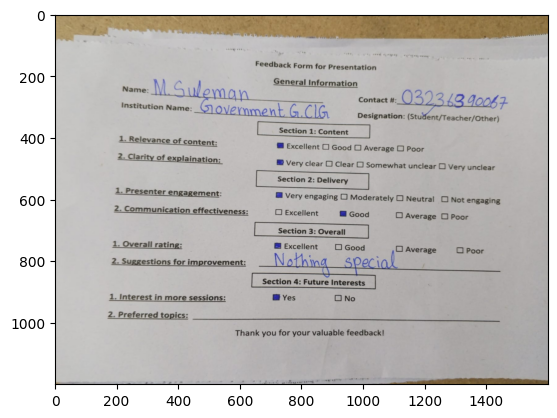

In [35]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
image_path = "/content/test_image.jpeg"
image = Image.open(image_path)
orig_image = np.array(image)
plt.imshow(orig_image)
#rotate image anticlock wise 90
rotated_image = np.rot90(orig_image, k=1, axes=(0,1))
plt.imshow(rotated_image)


5760000
5760000


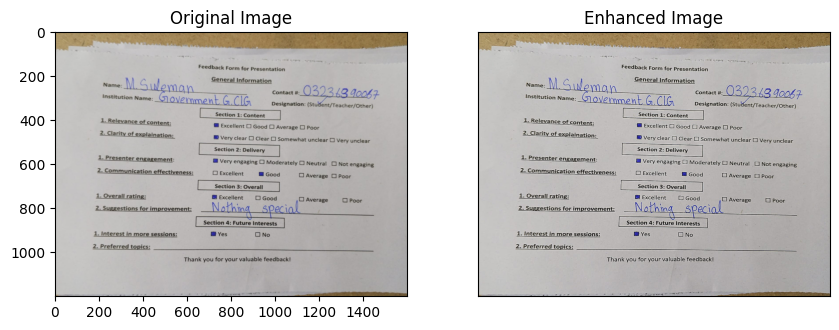

In [36]:
#sharpen the image jpeg
from PIL import Image, ImageEnhance
image = Image.open(image_path)
enhancer = ImageEnhance.Sharpness(image)
# enhance 10x
enhanced_image = enhancer.enhance(10)
enhanced_image = np.array(enhanced_image)
#clear enhanced_image more readable
enhanced_image = enhanced_image.astype(np.uint8)
# enhanced_image = Image.fromarray(enhanced_image)
#show side by side differnce of images before and after effects
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
orig_image = np.rot90(orig_image, k=1)
axs[0].imshow(orig_image)
axs[0].set_title('Original Image')
plt.xticks([])
plt.yticks([])
# size of this image
print(orig_image.size)


# rotate images anticlock 90 degree
enhanced_image = np.rot90(enhanced_image, k=1)
axs[1].imshow(enhanced_image)
axs[1].set_title('Enhanced Image')
plt.xticks([])
plt.yticks([])
# size of this image
print(enhanced_image.size)



# plt.show()

# remove x-axis and y-axis Numbering

# #rotate image anticlock wise 90
# image = np.rot90(enhanced_image, k=1, )
# plt.imshow(enhanced_image)
# #size of this image before and after enhancement
# print(image.size)
# print(enhanced_image.size)


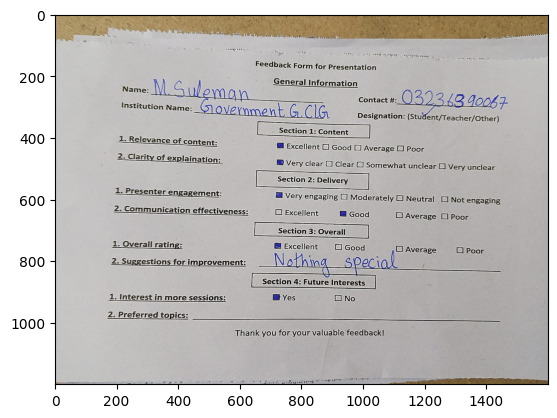

In [37]:
#convert np.array image to normal image jpeg
enhanced_image = Image.fromarray(enhanced_image)
# enhanced_image.save('enhanced_image.jpeg')
plt.imshow(enhanced_image)
#save this file local_image_path = "/content/enhanced_image.jpeg
local_image_path = "/content/enhanced_image.jpeg"
enhanced_image.save(local_image_path)

In [42]:
# local_image_path = "/content/test_image.jpeg"

print(local_image_path)
Image.open(local_image_path)
# cloud_file = genai_cloud_client.files.upload(file=local_image_path)
# print(cloud_file)
response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents=['could you extract key:value pairs in json ouput from image provided, for the values selection select ticked or highlighted checkbox from choices etc' , local_image_path]
)
print(response.text)

/content/enhanced_image.jpeg
I am unable to process images directly, so I need you to describe the image content to me as text, so that I can extract the key:value pairs in JSON format.

